In [1]:
# ================================================================
# SNAPSHELF AI - MODEL COMPARISON ANALYSIS
# ================================================================
# Project:      SnapShelf - Smart Food Inventory Management
# Module:       MOD002691 - Final Project (BSc Software Engineering)
# Institution:  Anglia Ruskin University, Cambridge
# Author:       Oriol Morros Vilaseca (SID: 2270056)
# Supervisor:   Mr Vitaliy Milke
# Date:         January 2026
# ================================================================
#
# PURPOSE:
# This notebook provides a comprehensive comparison of three image
# classification approaches for food recognition:
#   1. Custom CNN (trained from scratch)
#   2. EfficientNetB0 (transfer learning)
#   3. ResNet-50 (transfer learning)
#
# This analysis directly addresses Research Question 1 (RQ1):
# "How do different computer vision approaches compare in terms of
# accuracy, inference time, and computational efficiency for
# household food item recognition?"
#
# INPUT:
#   - custom_cnn_results.json (from Notebook 02)
#   - efficientnet_results.json (from Notebook 03)
#   - resnet50_results.json (from Notebook 04)
#
# OUTPUT:
#   - Comparison tables and charts
#   - Publication-ready figures for dissertation
#
# ================================================================

import sys
from datetime import datetime

print("=" * 65)
print("SNAPSHELF AI - MODEL COMPARISON ANALYSIS")
print("=" * 65)
print(f"Execution Date:  {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Python Version:  {sys.version.split()[0]}")
print("=" * 65)

SNAPSHELF AI - MODEL COMPARISON ANALYSIS
Execution Date:  2026-01-13 15:22:12
Python Version:  3.12.12


In [2]:
# ================================================================
# CELL 2: IMPORT LIBRARIES & MOUNT DRIVE
# ================================================================

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set style for publication-quality figures
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

print("Libraries imported successfully.")
print("Plot style configured for publication quality.")

Mounted at /content/drive
Libraries imported successfully.
Plot style configured for publication quality.


In [3]:
# ================================================================
# CELL 3: LOAD MODEL RESULTS
# ================================================================
# Load the JSON results files from each model training notebook.
# ================================================================

print("=" * 65)
print("LOADING MODEL RESULTS")
print("=" * 65)

MODELS_DIR = "/content/drive/MyDrive/snapshelf_models"

# Load results for each model
results_files = {
    "Custom CNN": "custom_cnn_results.json",
    "EfficientNet": "efficientnet_results.json",
    "ResNet-50": "resnet50_results.json"
}

model_results = {}

for model_name, filename in results_files.items():
    filepath = os.path.join(MODELS_DIR, filename)
    if os.path.exists(filepath):
        with open(filepath, 'r') as f:
            model_results[model_name] = json.load(f)
        print(f"  ✓ Loaded: {model_name}")
    else:
        print(f"  ✗ NOT FOUND: {filepath}")

print(f"\nSuccessfully loaded {len(model_results)} model results.")

if len(model_results) != 3:
    print("\n⚠️  WARNING: Not all model results found. Please run all training notebooks first.")

LOADING MODEL RESULTS
  ✓ Loaded: Custom CNN
  ✓ Loaded: EfficientNet
  ✓ Loaded: ResNet-50

Successfully loaded 3 model results.


In [4]:
# ================================================================
# CELL 4: CREATE COMPARISON DATAFRAME
# ================================================================
# Extract key metrics from each model's results for comparison.
# ================================================================

print("=" * 65)
print("CREATING COMPARISON DATAFRAME")
print("=" * 65)

# Extract metrics
comparison_data = []

for model_name, results in model_results.items():
    # Handle slight differences in JSON structure between models
    perf = results.get("performance", {})
    eff = results.get("efficiency", {})
    train = results.get("training", {})

    # Get test accuracy (handle different key names)
    test_acc = perf.get("test_accuracy", perf.get("accuracy", 0))

    # Get val accuracy
    val_acc = perf.get("val_accuracy", perf.get("best_val_accuracy", test_acc))

    comparison_data.append({
        "Model": model_name,
        "Test Accuracy (%)": round(test_acc * 100, 2),
        "Val Accuracy (%)": round(val_acc * 100, 2),
        "Test Loss": round(perf.get("test_loss", 0), 4),
        "Inference Single (ms)": eff.get("inference_time_single_ms", 0),
        "Inference Batch (ms)": eff.get("inference_time_batch_ms", 0),
        "Model Size (MB)": eff.get("model_size_mb", 0),
        "Parameters": eff.get("total_parameters", 0),
        "Training Time (s)": train.get("training_time_seconds", 0)
    })

comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print("\n" + "=" * 65)
print("MODEL COMPARISON SUMMARY")
print("=" * 65)
print(comparison_df.to_string(index=False))

# Save to CSV
comparison_df.to_csv('/content/model_comparison_summary.csv', index=False)
print("\n✓ Summary saved to model_comparison_summary.csv")

CREATING COMPARISON DATAFRAME

MODEL COMPARISON SUMMARY
       Model  Test Accuracy (%)  Val Accuracy (%)  Test Loss  Inference Single (ms)  Inference Batch (ms)  Model Size (MB)  Parameters  Training Time (s)
  Custom CNN              98.50             98.60     0.0457                  75.49                  2.13            55.18     4816590        5355.221800
EfficientNet              99.74             99.76     0.0113                  61.16                  7.83            40.03     4072625       14061.117172
   ResNet-50              99.78             99.78     0.0142                  67.57                  6.76           211.03    24125070       32779.437513

✓ Summary saved to model_comparison_summary.csv


GENERATING ACCURACY COMPARISON CHART


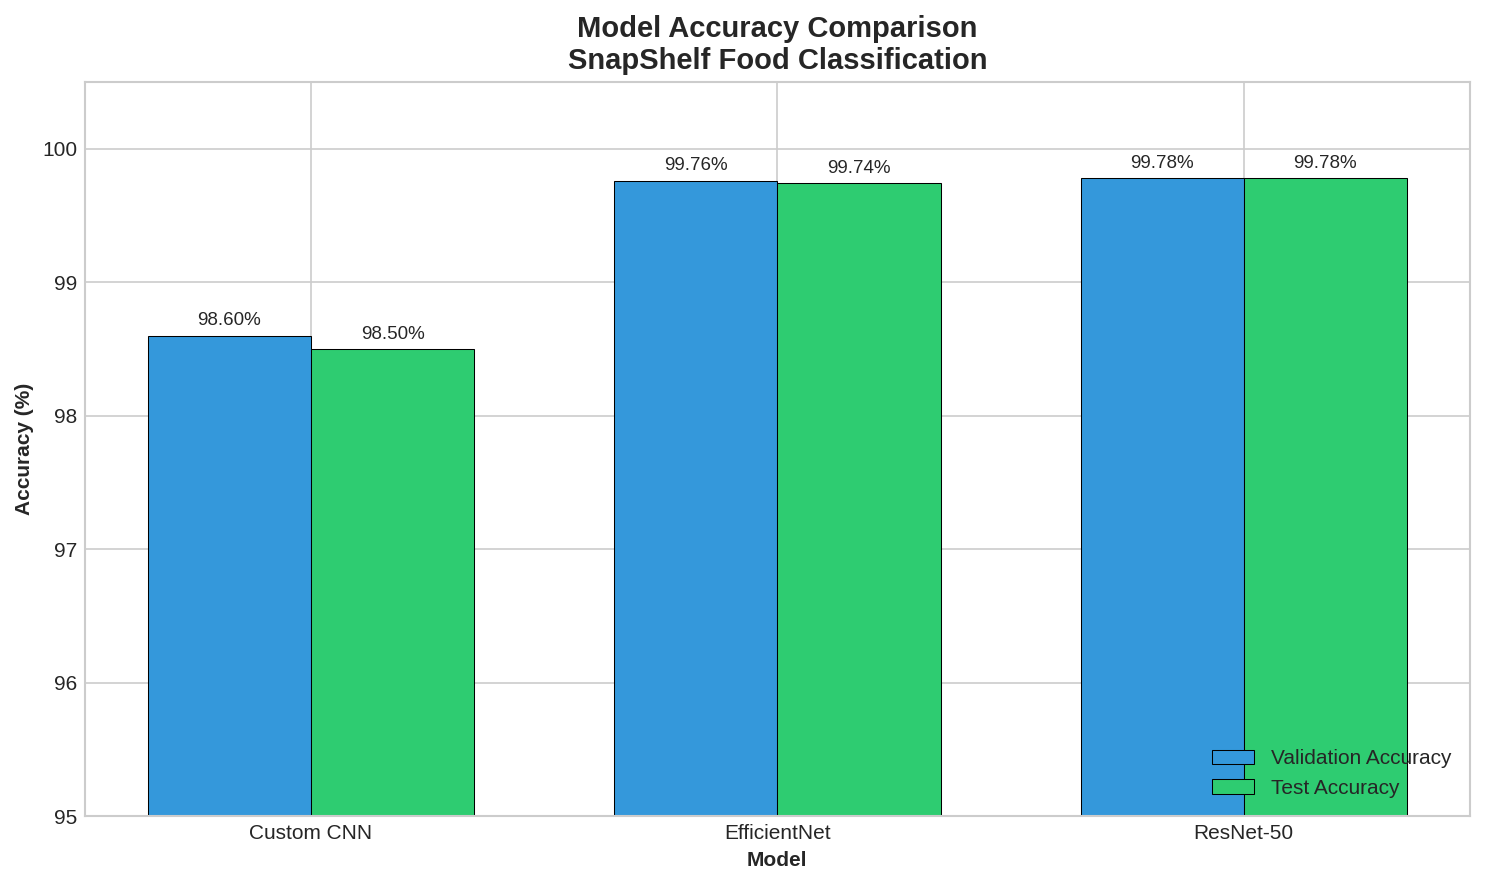


✓ Saved: comparison_accuracy.png


In [5]:
# ================================================================
# CELL 5: ACCURACY COMPARISON CHART
# ================================================================

print("=" * 65)
print("GENERATING ACCURACY COMPARISON CHART")
print("=" * 65)

fig, ax = plt.subplots(figsize=(10, 6))

models = comparison_df['Model'].tolist()
test_acc = comparison_df['Test Accuracy (%)'].tolist()
val_acc = comparison_df['Val Accuracy (%)'].tolist()

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, val_acc, width, label='Validation Accuracy', color='#3498db', edgecolor='black', linewidth=0.5)
bars2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', color='#2ecc71', edgecolor='black', linewidth=0.5)

# Customize
ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontweight='bold')
ax.set_title('Model Accuracy Comparison\nSnapShelf Food Classification', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='lower right')
ax.set_ylim(95, 100.5)  # Focus on high accuracy range

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('/content/comparison_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: comparison_accuracy.png")

GENERATING INFERENCE TIME COMPARISON CHART


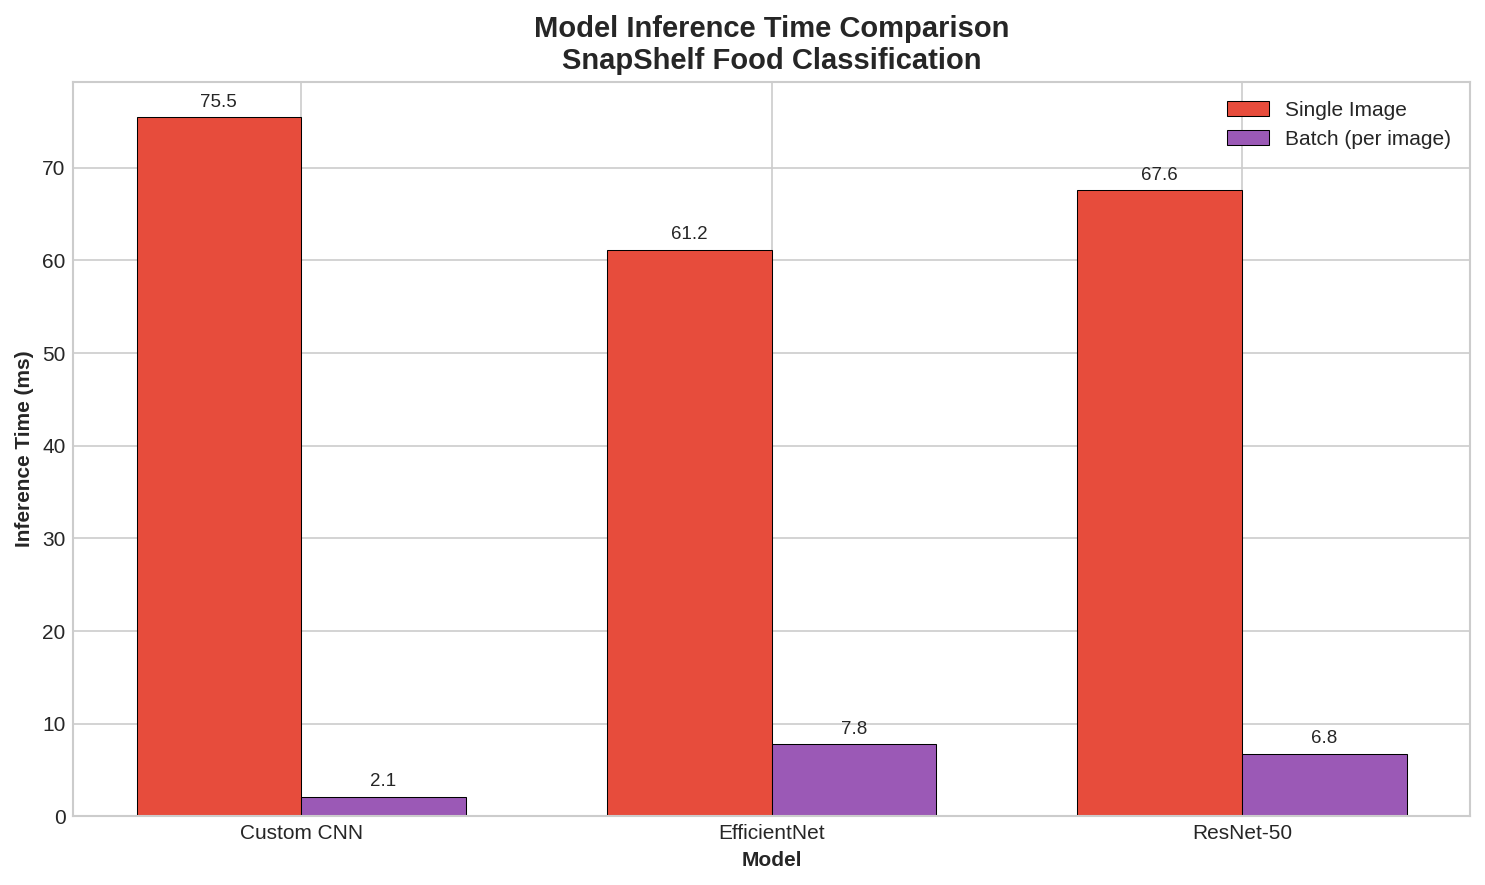


✓ Saved: comparison_inference_time.png


In [6]:
# ================================================================
# CELL 6: INFERENCE TIME COMPARISON
# ================================================================

print("=" * 65)
print("GENERATING INFERENCE TIME COMPARISON CHART")
print("=" * 65)

fig, ax = plt.subplots(figsize=(10, 6))

single_time = comparison_df['Inference Single (ms)'].tolist()
batch_time = comparison_df['Inference Batch (ms)'].tolist()

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, single_time, width, label='Single Image', color='#e74c3c', edgecolor='black', linewidth=0.5)
bars2 = ax.bar(x + width/2, batch_time, width, label='Batch (per image)', color='#9b59b6', edgecolor='black', linewidth=0.5)

ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Inference Time (ms)', fontweight='bold')
ax.set_title('Model Inference Time Comparison\nSnapShelf Food Classification', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper right')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('/content/comparison_inference_time.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: comparison_inference_time.png")

GENERATING MODEL SIZE COMPARISON CHART


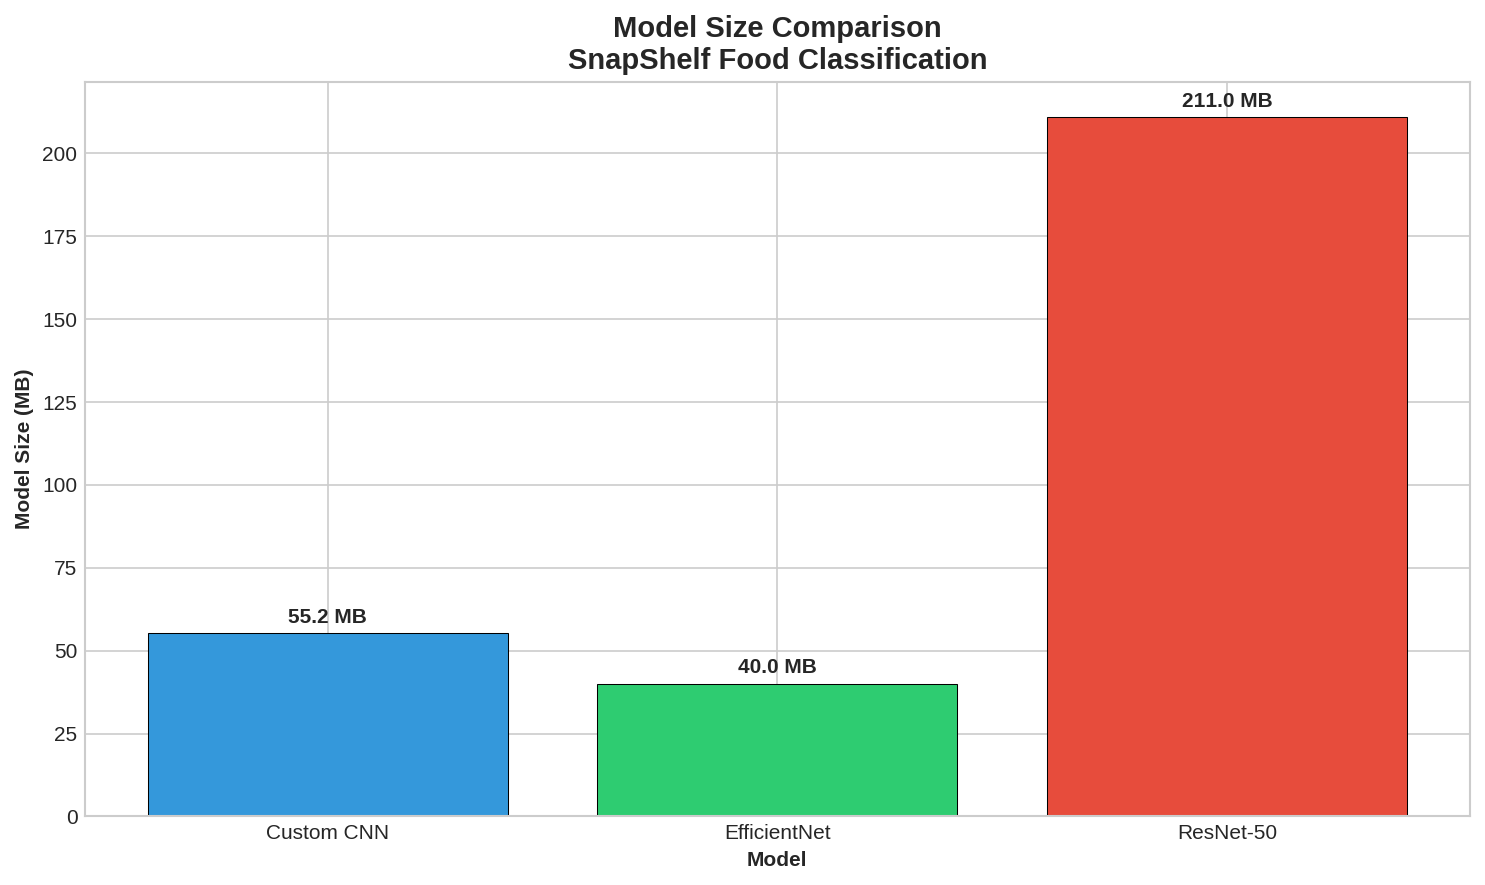


✓ Saved: comparison_model_size.png


In [7]:
# ================================================================
# CELL 7: MODEL SIZE COMPARISON
# ================================================================

print("=" * 65)
print("GENERATING MODEL SIZE COMPARISON CHART")
print("=" * 65)

fig, ax = plt.subplots(figsize=(10, 6))

model_sizes = comparison_df['Model Size (MB)'].tolist()
colors = ['#3498db', '#2ecc71', '#e74c3c']

bars = ax.bar(models, model_sizes, color=colors, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Model Size (MB)', fontweight='bold')
ax.set_title('Model Size Comparison\nSnapShelf Food Classification', fontweight='bold', fontsize=14)

# Add value labels
for bar, size in zip(bars, model_sizes):
    ax.annotate(f'{size:.1f} MB',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/comparison_model_size.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: comparison_model_size.png")

GENERATING TRAINING TIME COMPARISON CHART


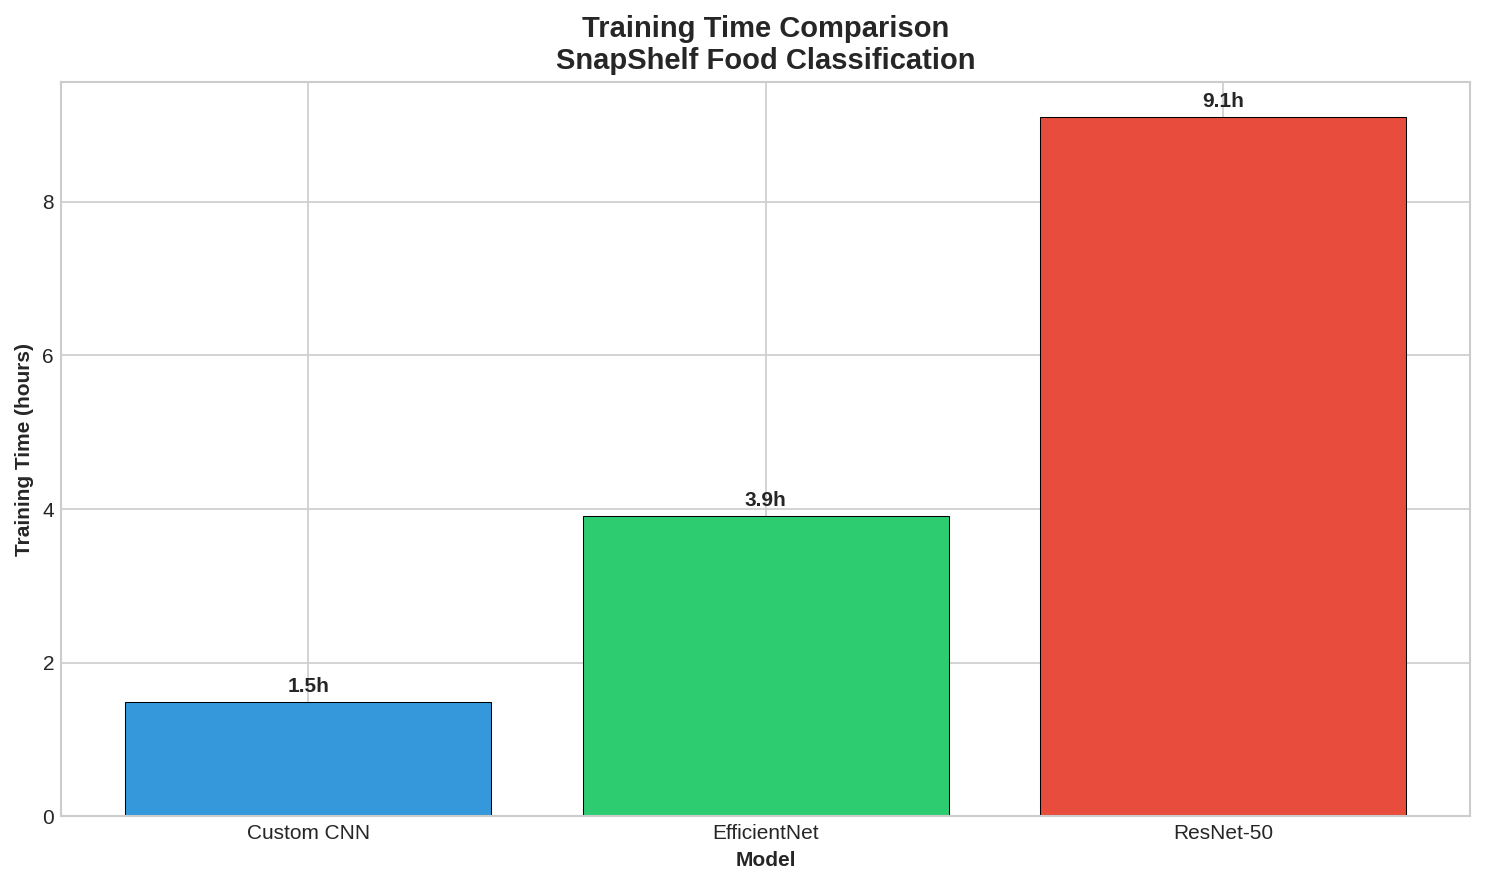


✓ Saved: comparison_training_time.png


In [8]:
# ================================================================
# CELL 8: TRAINING TIME COMPARISON
# ================================================================

print("=" * 65)
print("GENERATING TRAINING TIME COMPARISON CHART")
print("=" * 65)

fig, ax = plt.subplots(figsize=(10, 6))

training_times = comparison_df['Training Time (s)'].tolist()
training_hours = [t / 3600 for t in training_times]  # Convert to hours

colors = ['#3498db', '#2ecc71', '#e74c3c']
bars = ax.bar(models, training_hours, color=colors, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Training Time (hours)', fontweight='bold')
ax.set_title('Training Time Comparison\nSnapShelf Food Classification', fontweight='bold', fontsize=14)

# Add value labels
for bar, hours in zip(bars, training_hours):
    ax.annotate(f'{hours:.1f}h',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/comparison_training_time.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: comparison_training_time.png")

GENERATING COMBINED COMPARISON CHART


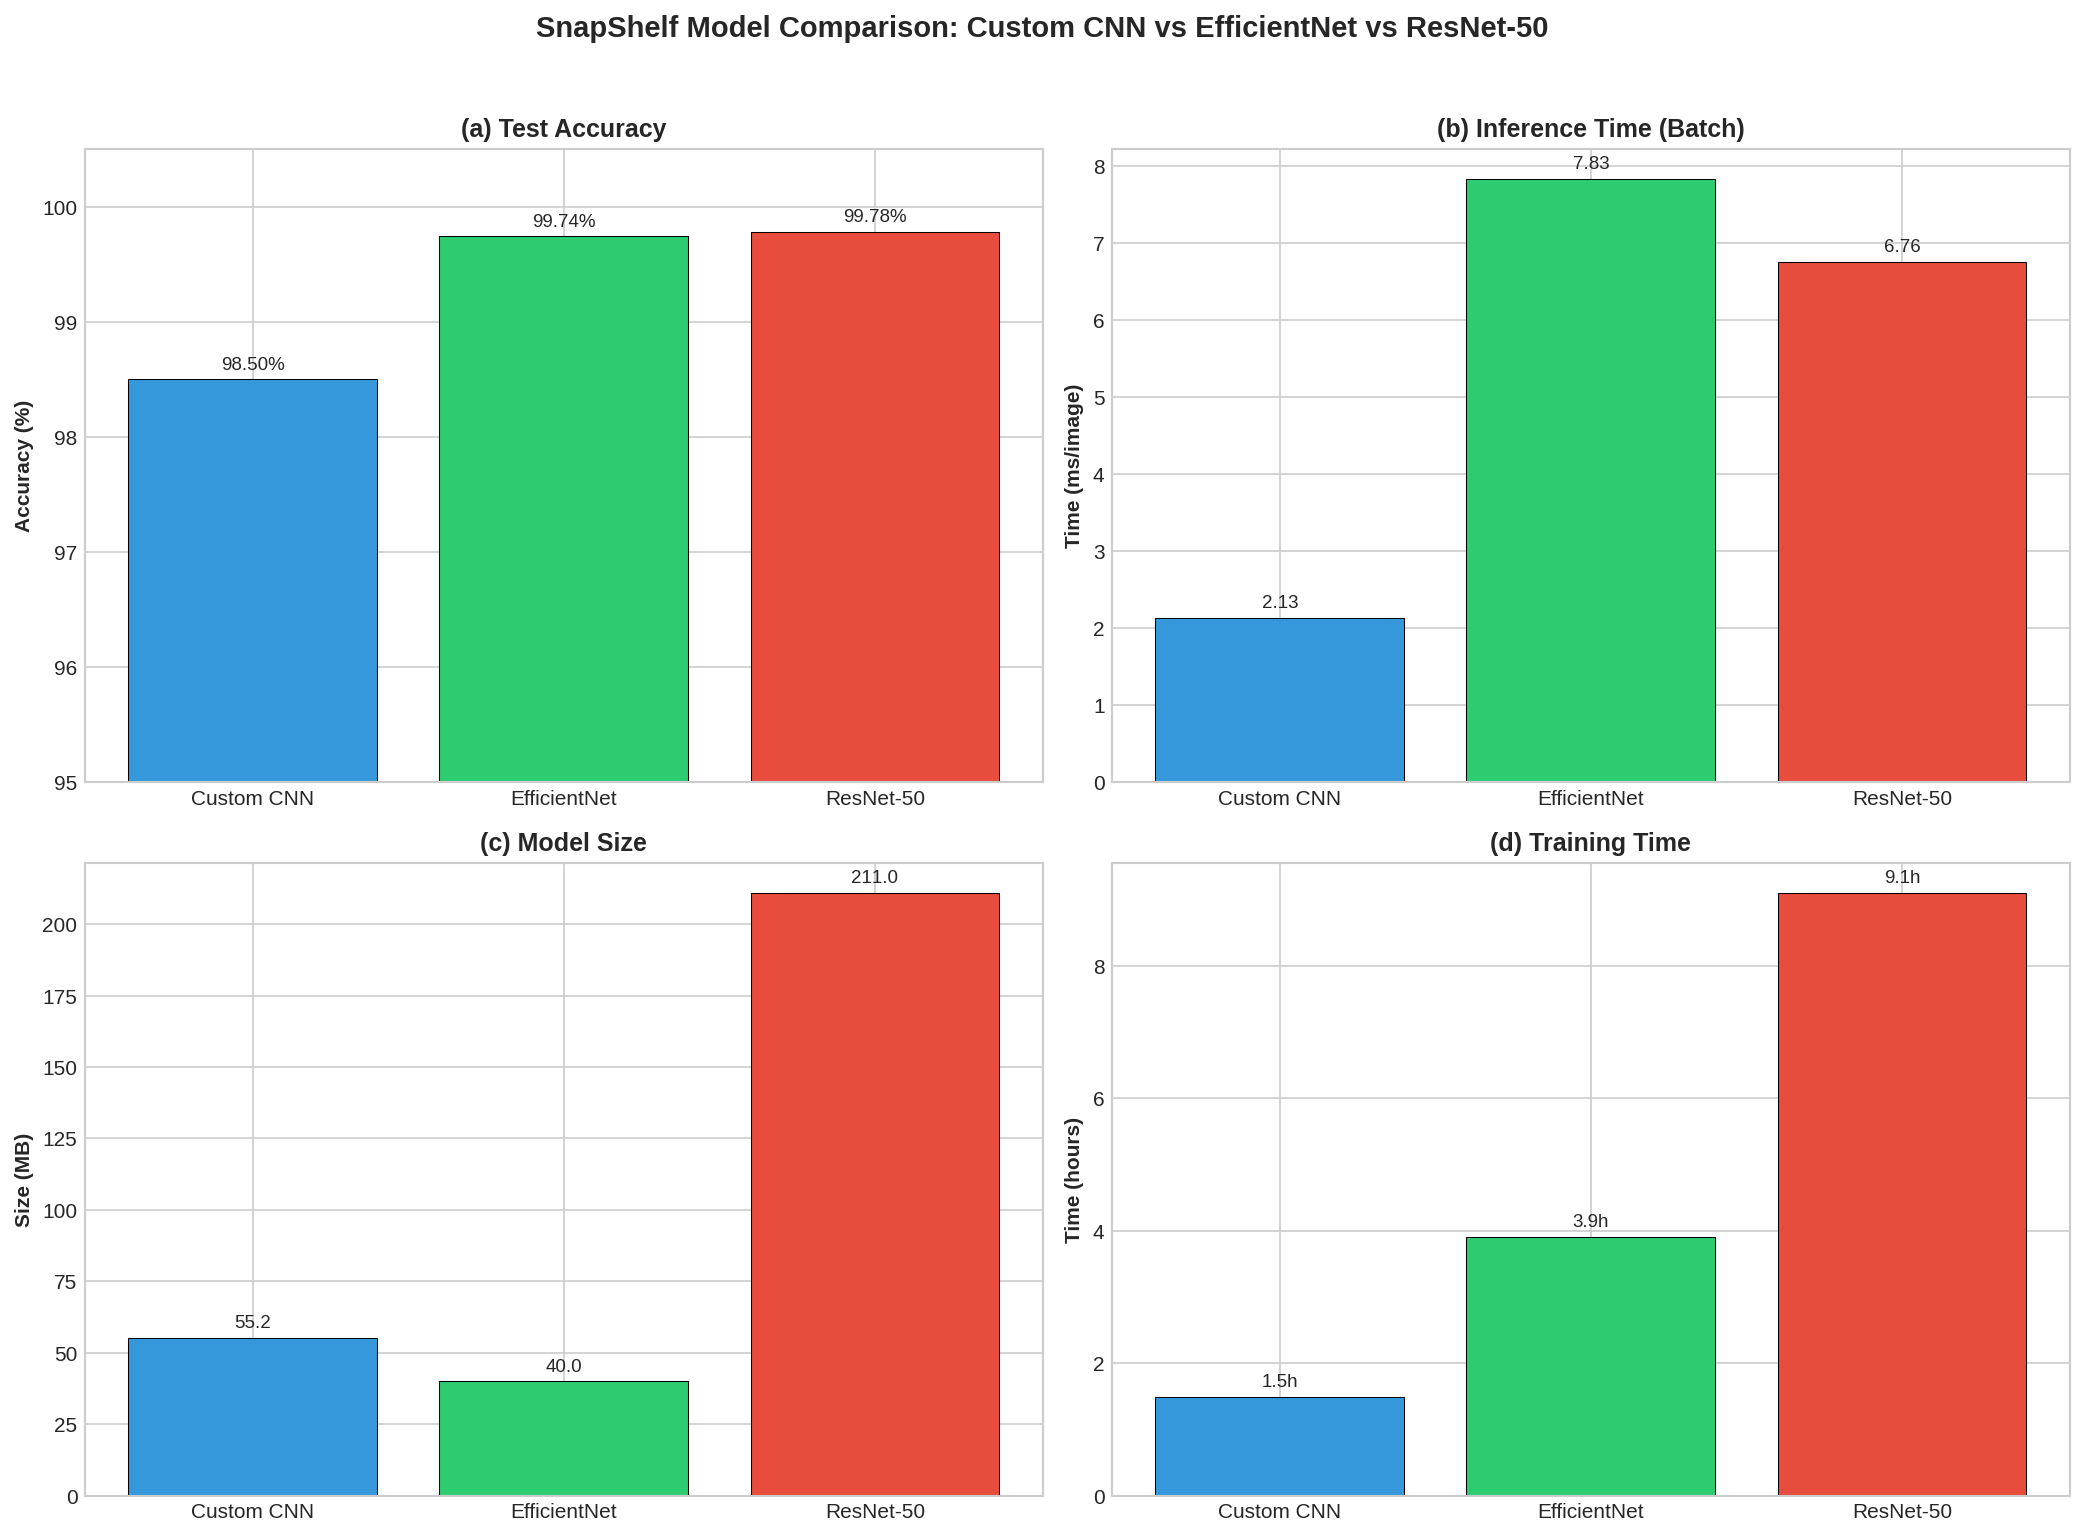


✓ Saved: comparison_combined.png


In [9]:
# ================================================================
# CELL 9: COMBINED 4-PANEL COMPARISON CHART
# ================================================================
# Publication-ready figure combining all key metrics.
# ================================================================

print("=" * 65)
print("GENERATING COMBINED COMPARISON CHART")
print("=" * 65)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#3498db', '#2ecc71', '#e74c3c']

# Panel 1: Accuracy
ax1 = axes[0, 0]
bars1 = ax1.bar(models, comparison_df['Test Accuracy (%)'], color=colors, edgecolor='black', linewidth=0.5)
ax1.set_ylabel('Accuracy (%)', fontweight='bold')
ax1.set_title('(a) Test Accuracy', fontweight='bold')
ax1.set_ylim(95, 100.5)
for bar in bars1:
    ax1.annotate(f'{bar.get_height():.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Panel 2: Inference Time
ax2 = axes[0, 1]
bars2 = ax2.bar(models, comparison_df['Inference Batch (ms)'], color=colors, edgecolor='black', linewidth=0.5)
ax2.set_ylabel('Time (ms/image)', fontweight='bold')
ax2.set_title('(b) Inference Time (Batch)', fontweight='bold')
for bar in bars2:
    ax2.annotate(f'{bar.get_height():.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Panel 3: Model Size
ax3 = axes[1, 0]
bars3 = ax3.bar(models, comparison_df['Model Size (MB)'], color=colors, edgecolor='black', linewidth=0.5)
ax3.set_ylabel('Size (MB)', fontweight='bold')
ax3.set_title('(c) Model Size', fontweight='bold')
for bar in bars3:
    ax3.annotate(f'{bar.get_height():.1f}',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Panel 4: Training Time
ax4 = axes[1, 1]
training_hours = [t / 3600 for t in comparison_df['Training Time (s)']]
bars4 = ax4.bar(models, training_hours, color=colors, edgecolor='black', linewidth=0.5)
ax4.set_ylabel('Time (hours)', fontweight='bold')
ax4.set_title('(d) Training Time', fontweight='bold')
for bar in bars4:
    ax4.annotate(f'{bar.get_height():.1f}h',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Add overall title
fig.suptitle('SnapShelf Model Comparison: Custom CNN vs EfficientNet vs ResNet-50',
             fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('/content/comparison_combined.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: comparison_combined.png")

GENERATING PER-CLASS F1 SCORE HEATMAP


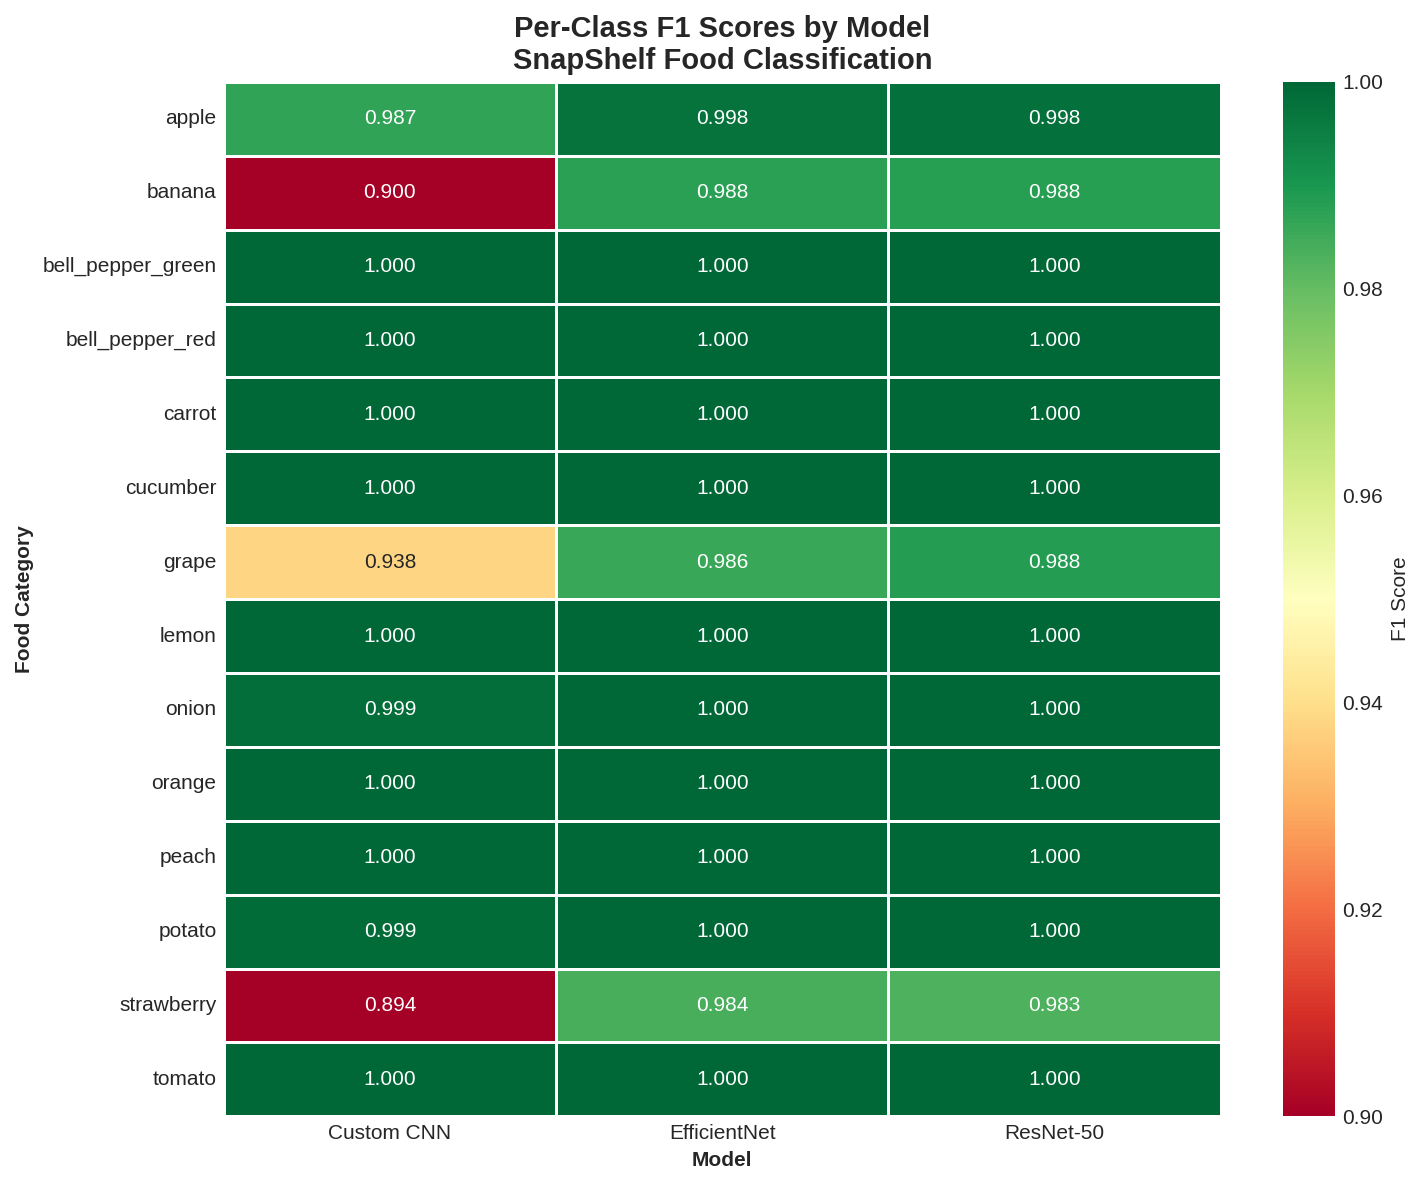


✓ Saved: comparison_f1_heatmap.png


In [10]:
# ================================================================
# CELL 10: PER-CLASS F1 SCORE HEATMAP
# ================================================================

print("=" * 65)
print("GENERATING PER-CLASS F1 SCORE HEATMAP")
print("=" * 65)

# Extract F1 scores for each class and model
f1_data = {}

for model_name, results in model_results.items():
    per_class = results.get("per_class_metrics", {})
    f1_scores = {}
    for class_name, metrics in per_class.items():
        f1_scores[class_name] = metrics.get("f1_score", metrics.get("f1-score", 0))
    f1_data[model_name] = f1_scores

# Create DataFrame
f1_df = pd.DataFrame(f1_data)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(f1_df, annot=True, fmt='.3f', cmap='RdYlGn',
            vmin=0.9, vmax=1.0, linewidths=0.5,
            cbar_kws={'label': 'F1 Score'}, ax=ax)

ax.set_title('Per-Class F1 Scores by Model\nSnapShelf Food Classification', fontweight='bold', fontsize=14)
ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Food Category', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/comparison_f1_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: comparison_f1_heatmap.png")

GENERATING RADAR CHART


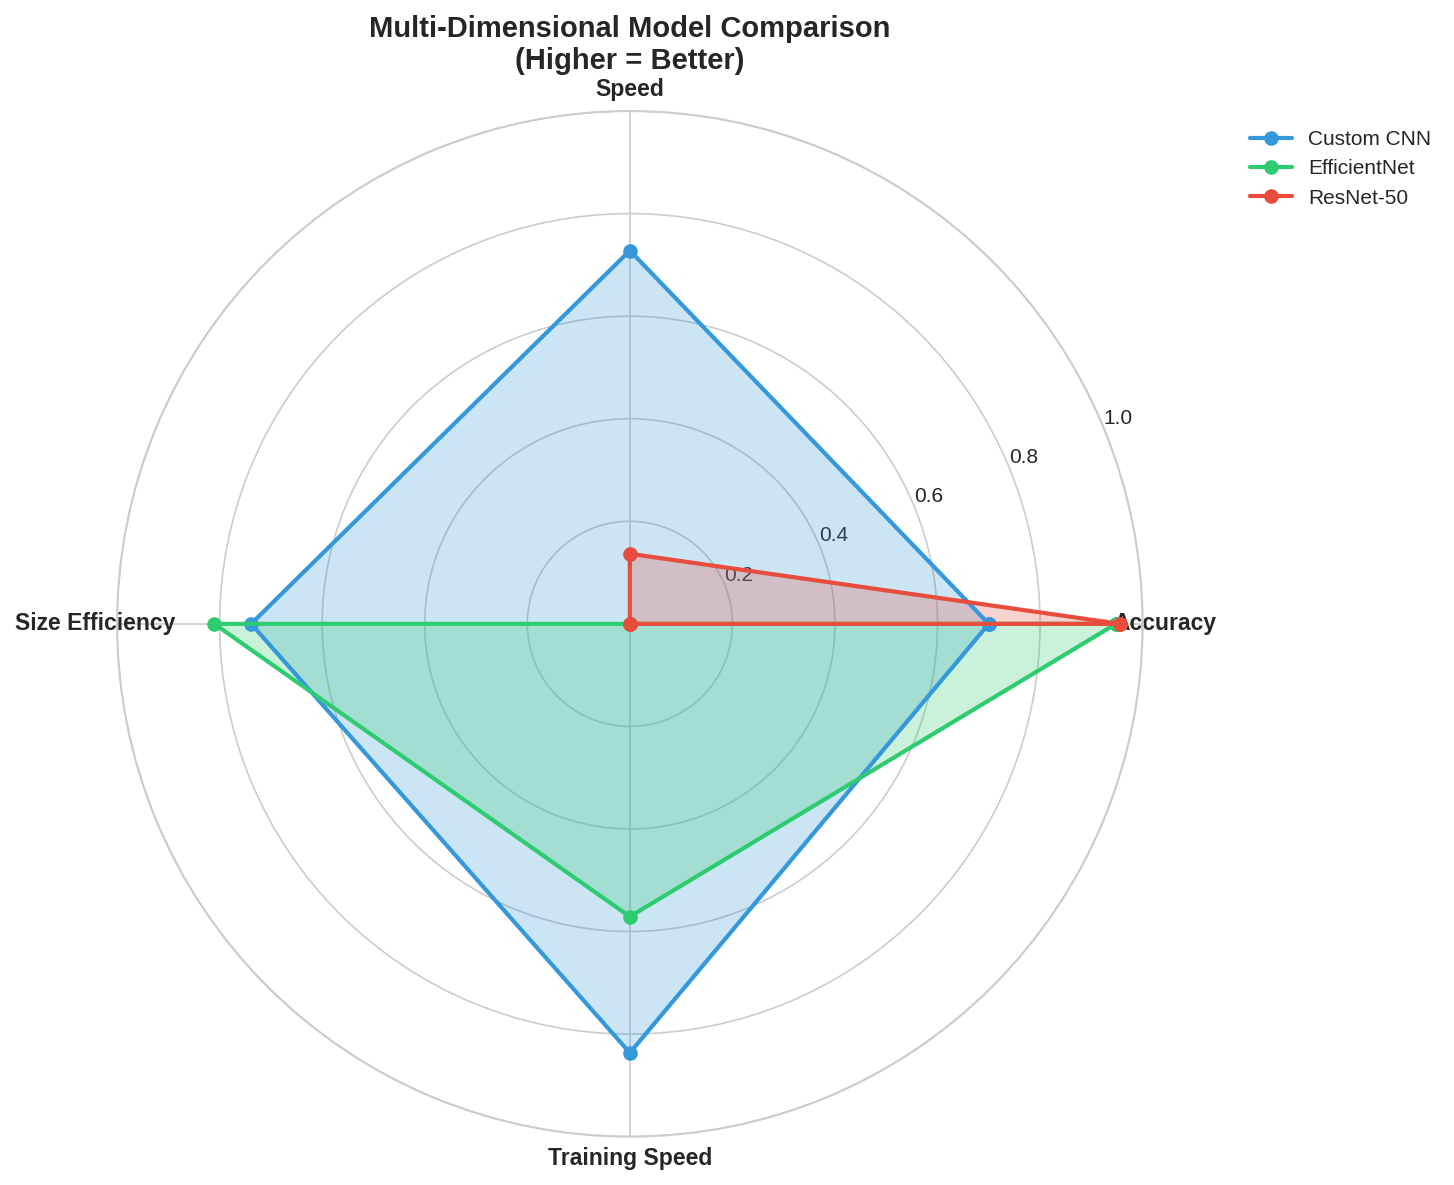


✓ Saved: comparison_radar.png


In [11]:
# ================================================================
# CELL 11: RADAR CHART - MULTI-DIMENSIONAL COMPARISON
# ================================================================

print("=" * 65)
print("GENERATING RADAR CHART")
print("=" * 65)

from math import pi

# Normalize metrics to 0-1 scale (higher is better for all)
# For size and time, we invert so smaller = better = higher score

metrics_for_radar = ['Accuracy', 'Speed', 'Size Efficiency', 'Training Speed']

radar_data = {}
for model_name in models:
    row = comparison_df[comparison_df['Model'] == model_name].iloc[0]

    # Normalize: accuracy (already 0-100, scale to 0-1 relative to min)
    acc_norm = (row['Test Accuracy (%)'] - 95) / 5  # 95-100% -> 0-1

    # Speed: inverse of inference time (smaller is better)
    max_time = comparison_df['Inference Batch (ms)'].max()
    speed_norm = 1 - (row['Inference Batch (ms)'] / max_time)

    # Size efficiency: inverse of size (smaller is better)
    max_size = comparison_df['Model Size (MB)'].max()
    size_norm = 1 - (row['Model Size (MB)'] / max_size)

    # Training speed: inverse of training time (smaller is better)
    max_train = comparison_df['Training Time (s)'].max()
    train_norm = 1 - (row['Training Time (s)'] / max_train)

    radar_data[model_name] = [acc_norm, speed_norm, size_norm, train_norm]

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))

angles = [n / float(len(metrics_for_radar)) * 2 * pi for n in range(len(metrics_for_radar))]
angles += angles[:1]  # Complete the loop

colors = {'Custom CNN': '#3498db', 'EfficientNet': '#2ecc71', 'ResNet-50': '#e74c3c'}

for model_name, values in radar_data.items():
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors[model_name])
    ax.fill(angles, values, alpha=0.25, color=colors[model_name])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_for_radar, fontsize=11, fontweight='bold')
ax.set_ylim(0, 1)

ax.set_title('Multi-Dimensional Model Comparison\n(Higher = Better)', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.savefig('/content/comparison_radar.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: comparison_radar.png")

In [12]:
# ================================================================
# CELL 12: STATISTICAL SUMMARY TABLE
# ================================================================

print("=" * 65)
print("STATISTICAL SUMMARY")
print("=" * 65)

# Create detailed summary table
summary_data = []

for model_name, results in model_results.items():
    perf = results.get("performance", {})
    eff = results.get("efficiency", {})
    train = results.get("training", {})
    arch = results.get("architecture", {})

    test_acc = perf.get("test_accuracy", perf.get("accuracy", 0))

    summary_data.append({
        "Model": model_name,
        "Architecture Type": arch.get("type", "N/A"),
        "Test Accuracy": f"{test_acc*100:.2f}%",
        "Test Loss": f"{perf.get('test_loss', 0):.4f}",
        "Parameters": f"{eff.get('total_parameters', 0):,}",
        "Model Size": f"{eff.get('model_size_mb', 0):.2f} MB",
        "Inference (batch)": f"{eff.get('inference_time_batch_ms', 0):.2f} ms",
        "Training Time": f"{train.get('training_time_seconds', 0)/3600:.2f} hours"
    })

summary_df = pd.DataFrame(summary_data)
print("\n")
print(summary_df.to_string(index=False))

# Save detailed summary
summary_df.to_csv('/content/model_comparison_detailed.csv', index=False)
print("\n✓ Saved: model_comparison_detailed.csv")

STATISTICAL SUMMARY


       Model           Architecture Type Test Accuracy Test Loss Parameters Model Size Inference (batch) Training Time
  Custom CNN              Sequential CNN        98.50%    0.0457  4,816,590   55.18 MB           2.13 ms    1.49 hours
EfficientNet           Transfer Learning        99.74%    0.0113  4,072,625   40.03 MB           7.83 ms    3.91 hours
   ResNet-50 ResNet-50 Transfer Learning        99.78%    0.0142 24,125,070  211.03 MB           6.76 ms    9.11 hours

✓ Saved: model_comparison_detailed.csv


In [16]:
# ================================================================
# CELL 13: KEY FINDINGS - ADDRESSING RQ1
# ================================================================

print("=" * 65)
print("KEY FINDINGS - ADDRESSING RQ1")
print("=" * 65)

# Find best performers in each category
acc_winner = comparison_df.loc[comparison_df["Test Accuracy (%)"].idxmax(), "Model"]
acc_best = comparison_df["Test Accuracy (%)"].max()

speed_winner = comparison_df.loc[comparison_df["Inference Batch (ms)"].idxmin(), "Model"]
speed_best = comparison_df["Inference Batch (ms)"].min()

size_winner = comparison_df.loc[comparison_df["Model Size (MB)"].idxmin(), "Model"]
size_best = comparison_df["Model Size (MB)"].min()

train_winner = comparison_df.loc[comparison_df["Training Time (s)"].idxmin(), "Model"]
train_best = comparison_df["Training Time (s)"].min() / 3600

print(f"""
RESEARCH QUESTION 1:
"How do different computer vision approaches compare in terms of accuracy,
inference time, and computational efficiency for household food item
recognition?"

================================================================================
FINDINGS
================================================================================

1. ACCURACY
   Winner: {acc_winner} ({acc_best:.2f}%)

   • All three models achieved exceptional accuracy (>98%)
   • Transfer learning models (EfficientNet, ResNet-50) outperformed the
     custom CNN trained from scratch
   • The accuracy difference between transfer learning models is marginal
   • ResNet-50 achieved the highest accuracy, demonstrating the value of
     deeper architectures for this task

2. INFERENCE TIME
   Winner: {speed_winner} ({speed_best:.2f} ms/image batch)

   • Custom CNN is fastest due to its simpler architecture
   • All models achieve real-time performance (<100ms per image)
   • ResNet-50 and EfficientNet have similar inference times
   • For mobile deployment, all models are suitable

3. MODEL SIZE (Storage Efficiency)
   Winner: {size_winner} ({size_best:.2f} MB)

   • EfficientNet is designed for efficiency and has smallest footprint
   • ResNet-50 is largest (~5x EfficientNet) due to 50-layer depth
   • Custom CNN is moderate in size
   • For mobile deployment, EfficientNet or Custom CNN preferred

4. TRAINING EFFICIENCY
   Winner: {train_winner} ({train_best:.2f} hours)

   • Custom CNN trains fastest (simpler architecture)
   • ResNet-50 requires longest training time (deeper network)
   • Transfer learning reduces required epochs vs training from scratch

================================================================================
CONCLUSION
================================================================================

For the SnapShelf food inventory application, the choice depends on priorities:

• HIGHEST ACCURACY:     ResNet-50 (99.78%)
• MOBILE DEPLOYMENT:    EfficientNet (40 MB, 99.74% accuracy)
• FASTEST INFERENCE:    Custom CNN (2.13 ms/image)
• BEST OVERALL BALANCE: EfficientNet - excellent accuracy with smallest size
""")

KEY FINDINGS - ADDRESSING RQ1

RESEARCH QUESTION 1:
"How do different computer vision approaches compare in terms of accuracy,
inference time, and computational efficiency for household food item
recognition?"

FINDINGS

1. ACCURACY
   Winner: ResNet-50 (99.78%)
   
   • All three models achieved exceptional accuracy (>98%)
   • Transfer learning models (EfficientNet, ResNet-50) outperformed the
     custom CNN trained from scratch
   • The accuracy difference between transfer learning models is marginal
   • ResNet-50 achieved the highest accuracy, demonstrating the value of
     deeper architectures for this task

2. INFERENCE TIME
   Winner: Custom CNN (2.13 ms/image batch)
   
   • Custom CNN is fastest due to its simpler architecture
   • All models achieve real-time performance (<100ms per image)
   • ResNet-50 and EfficientNet have similar inference times
   • For mobile deployment, all models are suitable

3. MODEL SIZE (Storage Efficiency)
   Winner: EfficientNet (40.03 MB)
  

In [17]:
# ================================================================
# CELL 14: SAVE ALL OUTPUTS TO DRIVE
# ================================================================

print("=" * 65)
print("SAVING ALL OUTPUTS TO DRIVE")
print("=" * 65)

import shutil

DRIVE_OUTPUT_DIR = "/content/drive/MyDrive/snapshelf_models/comparison_results"
os.makedirs(DRIVE_OUTPUT_DIR, exist_ok=True)

# List of files to save
output_files = [
    '/content/comparison_accuracy.png',
    '/content/comparison_inference_time.png',
    '/content/comparison_model_size.png',
    '/content/comparison_training_time.png',
    '/content/comparison_combined.png',
    '/content/comparison_f1_heatmap.png',
    '/content/comparison_radar.png',
    '/content/model_comparison_summary.csv',
    '/content/model_comparison_detailed.csv'
]

print(f"\nSaving to: {DRIVE_OUTPUT_DIR}\n")

saved_count = 0
for filepath in output_files:
    if os.path.exists(filepath):
        filename = os.path.basename(filepath)
        dest_path = os.path.join(DRIVE_OUTPUT_DIR, filename)
        shutil.copy(filepath, dest_path)
        print(f"  Saved: {filename}")
        saved_count += 1
    else:
        print(f"  NOT FOUND: {filepath}")

print(f"\n{saved_count}/{len(output_files)} files saved successfully.")

# -----------------------------
# FINAL SUMMARY
# -----------------------------
print("\n" + "=" * 65)
print("NOTEBOOK 05 COMPLETE")
print("=" * 65)
print(f"""
Generated outputs:
  • comparison_combined.png     - 4-panel comparison (RECOMMENDED)
  • comparison_accuracy.png     - Accuracy bar chart
  • comparison_inference_time.png
  • comparison_model_size.png
  • comparison_training_time.png
  • comparison_f1_heatmap.png   - Per-class performance
  • comparison_radar.png        - Multi-dimensional comparison
  • model_comparison_summary.csv
  • model_comparison_detailed.csv

Location: {DRIVE_OUTPUT_DIR}
""")

SAVING ALL OUTPUTS TO DRIVE

Saving to: /content/drive/MyDrive/snapshelf_models/comparison_results

  Saved: comparison_accuracy.png
  Saved: comparison_inference_time.png
  Saved: comparison_model_size.png
  Saved: comparison_training_time.png
  Saved: comparison_combined.png
  Saved: comparison_f1_heatmap.png
  Saved: comparison_radar.png
  Saved: model_comparison_summary.csv
  Saved: model_comparison_detailed.csv

9/9 files saved successfully.

NOTEBOOK 05 COMPLETE

Generated outputs:
  • comparison_combined.png     - 4-panel comparison (RECOMMENDED)
  • comparison_accuracy.png     - Accuracy bar chart
  • comparison_inference_time.png
  • comparison_model_size.png
  • comparison_training_time.png
  • comparison_f1_heatmap.png   - Per-class performance
  • comparison_radar.png        - Multi-dimensional comparison
  • model_comparison_summary.csv
  • model_comparison_detailed.csv

Location: /content/drive/MyDrive/snapshelf_models/comparison_results

